## Problem Statement

One of the organizations looking to segregate the individual based on the income range so that they can leverage the information for their business needs. In this case study, we need to classify if the individual belongs to a salary range of >50K or <=50K. We need to work on the decision tree algorithm and perform the below tasks. 

# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

# Data Preperation

In [2]:
dataset = pd.read_csv('Cencus_Income.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            5268 non-null   int64 
 1   Fnlwgt         5268 non-null   int64 
 2   Education      5268 non-null   object
 3   Education_Num  5268 non-null   int64 
 4   MaritalStatus  5268 non-null   object
 5   Occupation     5268 non-null   object
 6   Relationship   5268 non-null   object
 7   Race           5268 non-null   object
 8   Gender         5268 non-null   object
 9   Capital_Gain   5268 non-null   int64 
 10  Capital_Loss   5268 non-null   int64 
 11  HoursPerWeek   5268 non-null   int64 
 12  NativeCountry  5268 non-null   object
 13  Outcome        5268 non-null   object
dtypes: int64(6), object(8)
memory usage: 576.3+ KB


In [4]:
dataset.columns

Index(['Age', 'Fnlwgt', 'Education', 'Education_Num', 'MaritalStatus',
       'Occupation', 'Relationship', 'Race', 'Gender', 'Capital_Gain',
       'Capital_Loss', 'HoursPerWeek', 'NativeCountry', 'Outcome'],
      dtype='object')

In [5]:
dataset.head()

,Age,Fnlwgt,Education,Education_Num,MaritalStatus,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,HoursPerWeek,NativeCountry,Outcome
0,42,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
1,37,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
2,49,193366,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
3,41,147372,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,48,United-States,<=50K
4,36,155537,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [6]:
len(dataset.columns)

14

# Exploratory Data Analysis

<Figure size 1500x200 with 0 Axes>

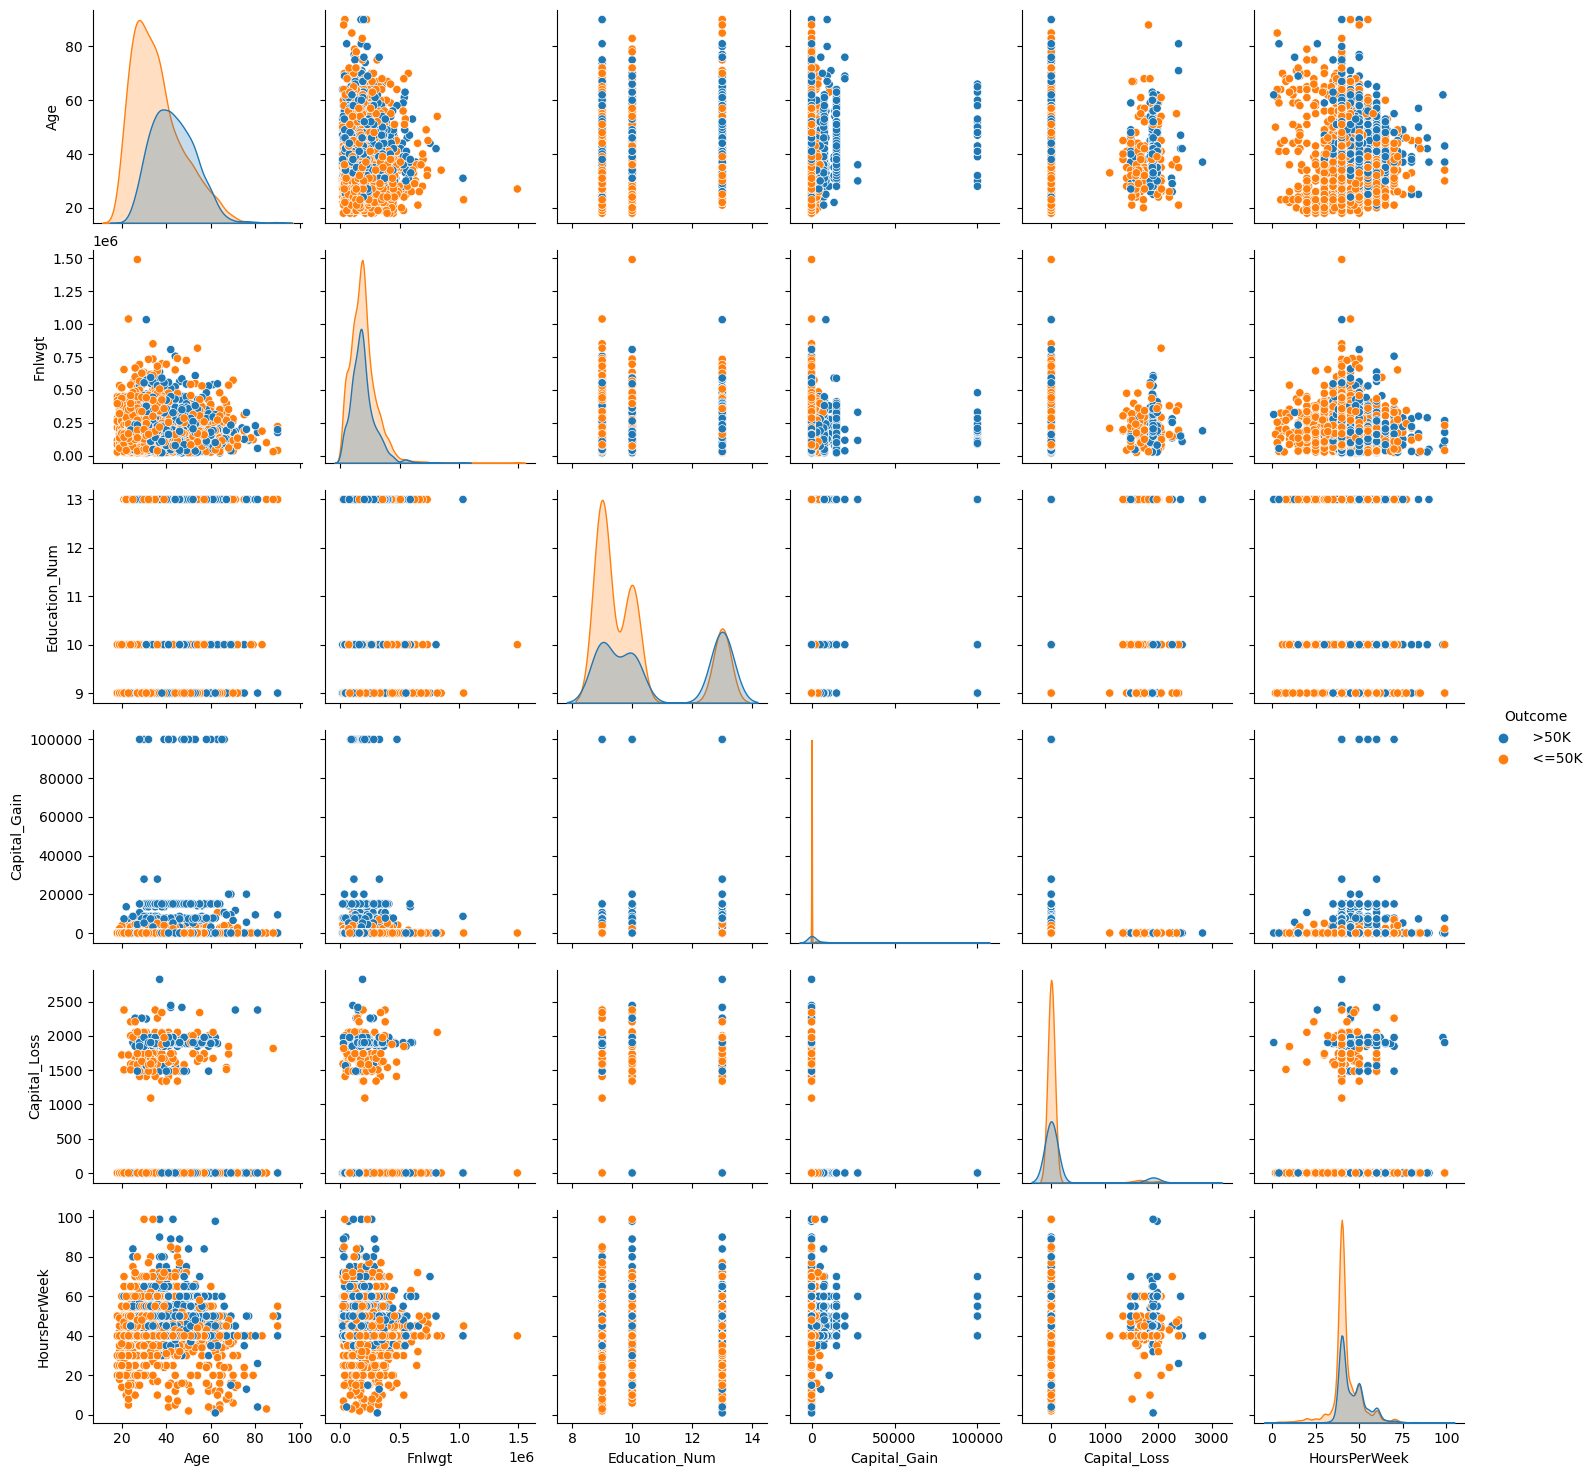

In [7]:
plt.figure(figsize=(15,2))
sns.pairplot(dataset[['Age','Fnlwgt', 'Education_Num','Capital_Gain', 'Capital_Loss', 'HoursPerWeek','Outcome']],hue='Outcome')
plt.show()

**From the above chart there is no significant outcome which can tell us that numerical variables are important for predicting the class**

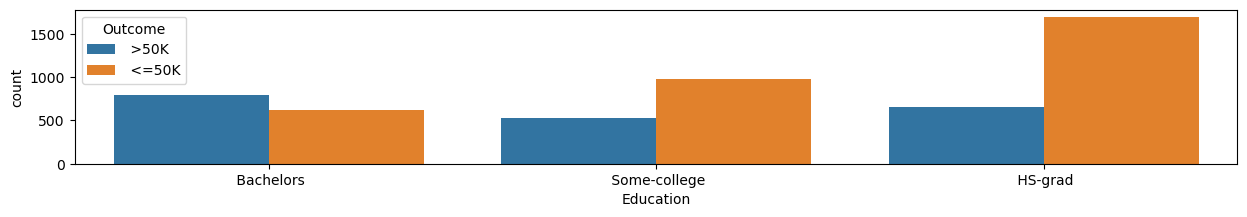

In [8]:
plt.figure(figsize=(15,2))
sns.countplot(data=dataset, x = 'Education',hue='Outcome')
plt.show()

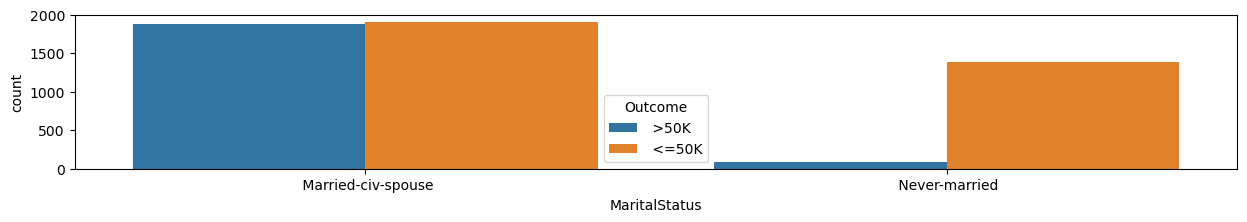

In [9]:
plt.figure(figsize=(15,2))
sns.countplot(data=dataset, x = 'MaritalStatus',hue='Outcome')
plt.show()

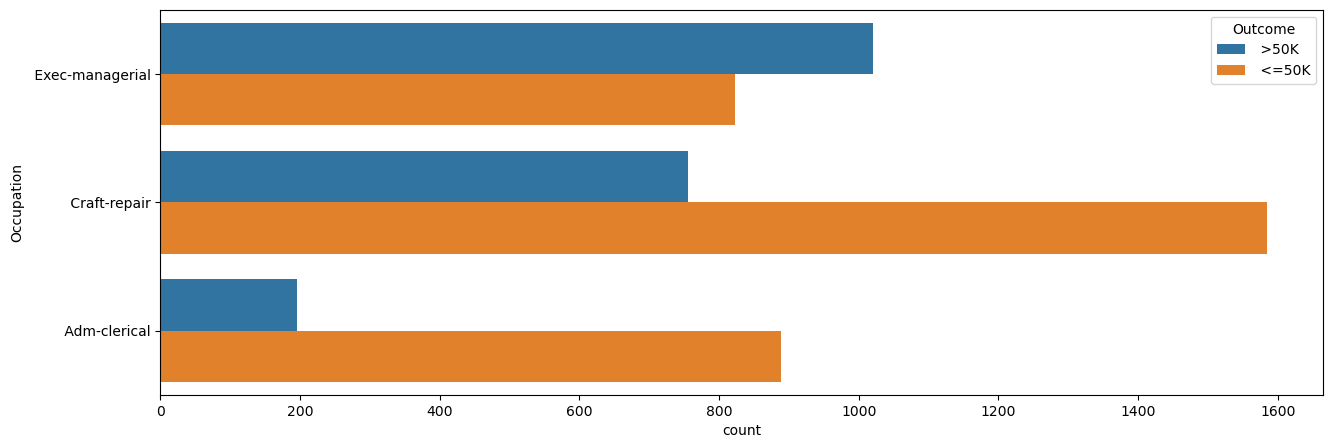

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(data=dataset, y = 'Occupation',hue='Outcome')
plt.show()

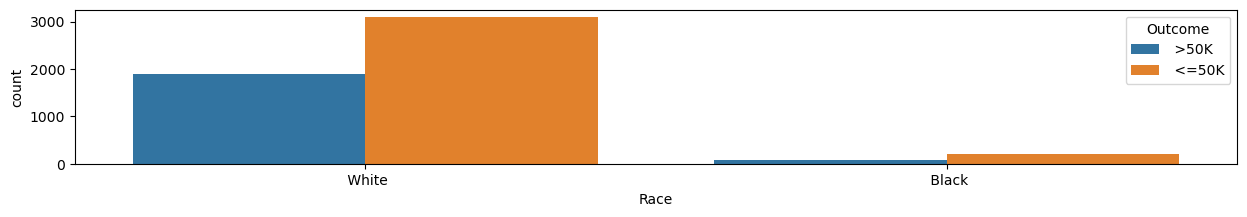

In [11]:
plt.figure(figsize=(15,2))
sns.countplot(data=dataset, x = 'Race',hue='Outcome')
plt.show()

**There are more number of female in the <=50K**

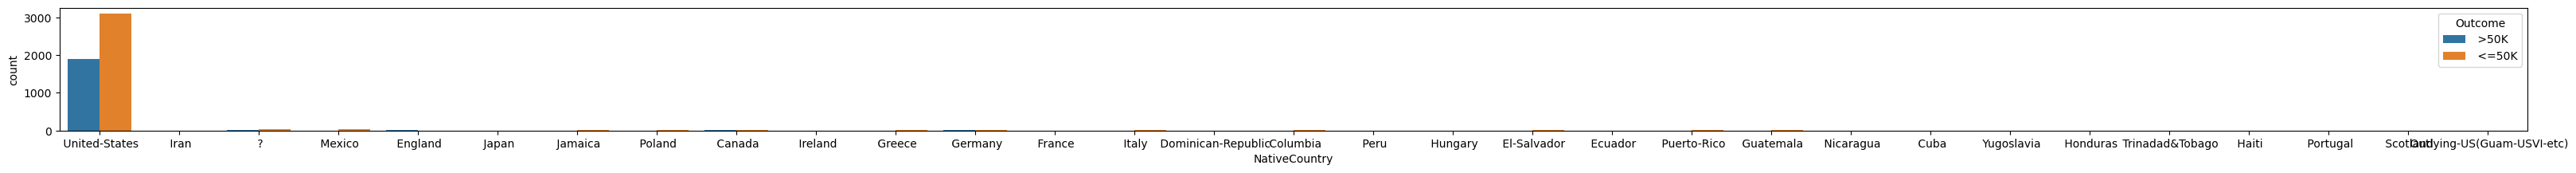

In [12]:
plt.figure(figsize=(40,2))
sns.countplot(data=dataset, x = 'NativeCountry',hue='Outcome')
plt.show()

# Missing Value Treatment

In [13]:
dataset.isnull().sum()/len(dataset)*100

Age              0.0
Fnlwgt           0.0
Education        0.0
Education_Num    0.0
MaritalStatus    0.0
Occupation       0.0
Relationship     0.0
Race             0.0
Gender           0.0
Capital_Gain     0.0
Capital_Loss     0.0
HoursPerWeek     0.0
NativeCountry    0.0
Outcome          0.0
dtype: float64

# Encoding and Feature Scaling

In [14]:
# Separating the numerical and categorical columns
from sklearn.preprocessing import StandardScaler
def data_type(dataset):
    numerical = []
    categorical = []
    for i in dataset.columns:
        if dataset[i].dtype == 'int64' or dataset[i].dtype == 'float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical


numerical, categorical = data_type(dataset)

# Identifying the binary columns and ignoring them from scaling
def binary_columns(df):

    binary_cols = []
    for col in df.select_dtypes(include=['int', 'float']).columns:
        unique_values = df[col].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(col)
    return binary_cols

binary_cols = binary_columns(dataset)

# Remove the binary columns from the numerical columns
numerical = [i for i in numerical if i not in binary_cols]

def encoding(dataset, categorical):
   
    for i in categorical:
        dataset[i] = dataset[i].astype('category')
        dataset[i] = dataset[i].cat.codes
    return dataset

dataset = encoding(dataset, categorical)

def feature_scaling(dataset, numerical):
   
    sc_x = StandardScaler()
    dataset[numerical] = sc_x.fit_transform(dataset[numerical])
    return dataset

dataset = feature_scaling(dataset, numerical)

In [15]:
dataset

,Age,Fnlwgt,Education,Education_Num,MaritalStatus,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,HoursPerWeek,NativeCountry,Outcome
0,0.296270,-0.309559,0,1.599628,0,2,0,1,1,0.563578,-0.246166,-0.412544,29,1
1,-0.142020,0.824668,2,-0.216632,0,2,0,0,1,-0.168245,-0.246166,4.119378,29,1
2,0.909876,0.008332,1,-0.822052,0,1,0,1,1,-0.168245,-0.246166,-0.412544,29,0
3,0.208612,-0.422752,1,-0.822052,0,0,0,1,1,-0.168245,-0.246166,0.493840,29,0
4,-0.229678,-0.346225,1,-0.822052,0,1,0,1,1,-0.168245,-0.246166,-0.412544,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,0.208612,-0.297037,2,-0.216632,0,2,0,1,1,-0.168245,-0.246166,1.853417,29,1
5264,-0.843284,1.335953,1,-0.822052,0,1,0,1,1,-0.168245,-0.246166,0.493840,29,0
5265,1.085192,-1.028710,1,-0.822052,0,1,0,1,1,-0.168245,-0.246166,-0.412544,29,0
5266,0.822218,0.872524,1,-0.822052,0,0,0,1,1,-0.168245,-0.246166,-0.412544,29,0


# Data Split and Model Building

In [16]:
x = dataset.iloc[:,0:13].values
y = dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30)

In [19]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [20]:
y_test_pred = model.predict(x_test)

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, log_loss

In [23]:
accuracy = accuracy_score(y_test, y_test_pred)
accuracy

0.7286527514231499

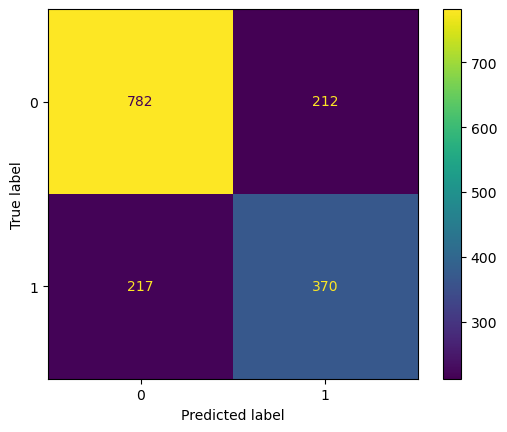

In [33]:

cm = confusion_matrix(y_test, y_test_pred, labels = model.classes_)
cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_ )
cm.plot()

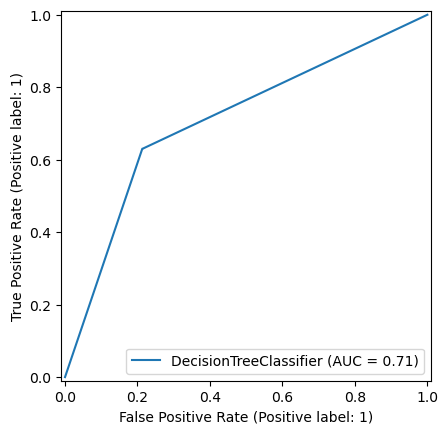

In [35]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model, x_test, y_test)

In [40]:
target_names = ['Negative(0)', 'Positive(1)']
print(classification_report(y_test, y_test_pred, target_names = target_names))

              precision    recall  f1-score   support

 Negative(0)       0.78      0.79      0.78       994
 Positive(1)       0.64      0.63      0.63       587

    accuracy                           0.73      1581
   macro avg       0.71      0.71      0.71      1581
weighted avg       0.73      0.73      0.73      1581



In [43]:
#It measures how well a model's predicted probabilities match the actual class labels.
#values near to 0 is best bodel
log_loss(y_test,y_test_pred)

9.780346175794598

# Compare Train test Accuracy

In [46]:
y_train_pred = model.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print('train_accuracy : ', train_accuracy)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('test_accuracy: ', test_accuracy)

train_accuracy :  0.9994575535665853
test_accuracy:  0.7286527514231499


**It seems aur model tried very hard on training data, hence overfitted. we need to do hyperparameter tuning**

# Cross validation and grid search

In [55]:
from sklearn.model_selection import GridSearchCV

parameters = [{'max_depth':[1,2,3,4,5,6,7,8,9,10], 'min_samples_split':[10, 20,30,40,50]}]
gs = GridSearchCV(estimator = model,
                 param_grid = parameters,
                 scoring = 'accuracy',
                 cv = 10,
                 n_jobs = -1)

gs.fit(x_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.7784029987039001
{'max_depth': 8, 'min_samples_split': 50}


**We are going with the default criteria of Gini as we prefer to go for it as Entropy consists of log which can be computationaly more exhaustive.**

In [57]:
from sklearn.tree import DecisionTreeClassifier

tuned_model = DecisionTreeClassifier(max_depth = 8, min_samples_split = 50)
tuned_model.fit(x_train, y_train)



DecisionTreeClassifier(max_depth=8, min_samples_split=50)

# Comparing train and test accuracies for tuned model

In [61]:
y_train_tuned = tuned_model.predict(x_train)
tuned_train_accuracy = accuracy_score(y_train, y_train_tuned)

y_test_tuned = tuned_model.predict(x_test)
tuned_test_accuracy =accuracy_score(y_test, y_test_tuned)

print('tuned model accuracy on training data: ',tuned_train_accuracy)
print('tuned model accuracy om test data: ', tuned_test_accuracy)

tuned model accuracy on training data:  0.7949552481692432
tuned model accuracy om test data:  0.7678684376976597


**Conclusion: now we get similar accuracy on both dataset means our model is giving good generalization on new unseen data**

In [62]:
# Create Decision Tree Plot
from IPython.display import Image
from sklearn import tree
import pydotplus

In [63]:
feature_names = dataset.iloc[:,0:13]
feature_names = feature_names.columns
feature_names

Index(['Age', 'Fnlwgt', 'Education', 'Education_Num', 'MaritalStatus',
       'Occupation', 'Relationship', 'Race', 'Gender', 'Capital_Gain',
       'Capital_Loss', 'HoursPerWeek', 'NativeCountry'],
      dtype='object')

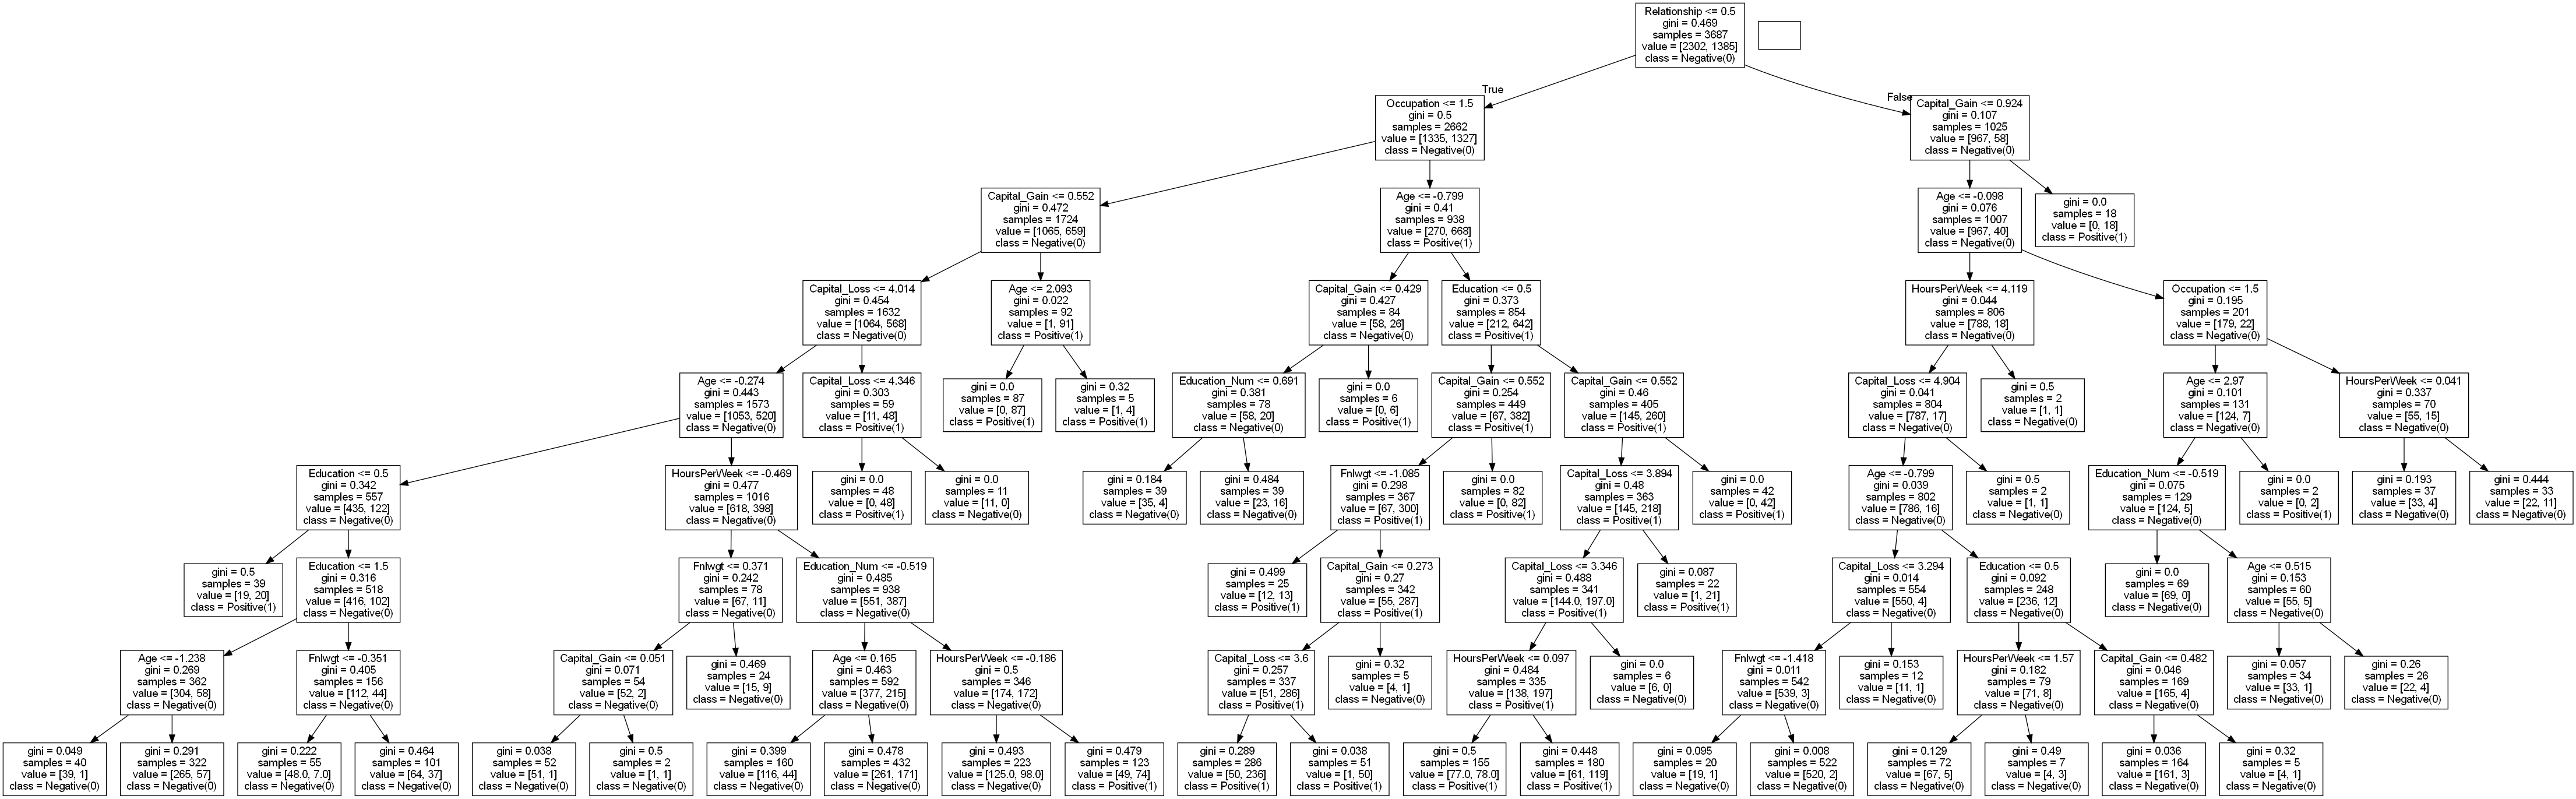

In [64]:
# Create A Dot Plot
dot_data = tree.export_graphviz(tuned_model,out_file=None,feature_names=feature_names,class_names=target_names)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Score card

In [71]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_auc_score, f1_score
score_card = pd.DataFrame(columns=['model_name','Accuracy Score','Precision Score','Recall Score','AUC Score','f1 Score'])


def update_score_card(y_test,y_pred,model_name):

    # assign 'score_card' as global variable
    global score_card 
    new_row = pd.DataFrame([{
        'model_name': model_name,
        'Accuracy Score': accuracy_score(y_test, y_pred),
        'Precision Score': precision_score(y_test, y_pred),
        'Recall Score': recall_score(y_test, y_pred),
        'AUC Score': roc_auc_score(y_test, y_pred),
        'f1 Score': f1_score(y_test, y_pred)
    }])

    # Use pd.concat() instead of append()
    score_card = pd.concat([score_card, new_row], ignore_index=True)
    

In [72]:
update_score_card(y_train, y_train_pred, 'model_train')
update_score_card(y_test, y_test_pred,'model_test')
update_score_card(y_train, y_train_tuned, 'model_tuned_train')
update_score_card(y_test,y_test_tuned,'model_tuned_test')

In [73]:
score_card

,model_name,Accuracy Score,Precision Score,Recall Score,AUC Score,f1 Score
0,model_train,0.999458,1.000000,0.998556,0.999278,0.999277
1,model_test,0.728653,0.635739,0.630324,0.708522,0.633020
2,model_tuned_train,0.794955,0.768574,0.649819,0.766048,0.704225
3,model_tuned_test,0.767868,0.706767,0.640545,0.741802,0.672029
